In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

Reading in the cleaned DataFrame with added features.

In [3]:
cancer = pd.read_csv('cancer_ml2.csv', index_col=['Geography'])

In [4]:
cancer.shape

(3047, 279)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, Abbeville County, South Carolina to Zavala County, Texas
Columns: 279 entries, avgAnnCount to POPLOSS00
dtypes: bool(66), float64(123), int64(90)
memory usage: 5.2+ MB


In [6]:
cancer.head()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,PctSomeCol18_24_isnull,PctEmployed16_Over_isnull,PctPrivateCoverageAlone_isnull,age_gt_100,household_lt_1,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,PCT_LACCESS_POP10_isnull,PCT_LACCESS_LOWI10_isnull,PCT_LACCESS_CHILD10_isnull,PCT_LACCESS_SENIORS10_isnull,PCT_LACCESS_HHNV10_isnull,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,FOODINSEC_00_02_isnull,FOODINSEC_07_09_isnull,FOODINSEC_10_12_isnull,CH_FOODINSEC_02_12_isnull,CH_FOODINSEC_09_12_isnull,VLFOODSEC_00_02_isnull,VLFOODSEC_07_09_isnull,VLFOODSEC_10_12_isnull,CH_VLFOODSEC_02_12_isnull,CH_VLFOODSEC_09_12_isnull,FOODINSEC_CHILD_01_07_isnull,FOODINSEC_CHILD_03_11_isnull,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_LOCLFARM07_isnull,PCT_LOCLSALE07_isnull,PC_DIRSALES07_isnull,FMRKT09_isnull,FMRKT13_isnull,PCH_FMRKT_09_13_isnull,FMRKTPTH09_isnull,FMRKTPTH13_isnull,PCH_FMRKTPTH_09_13_isnull,PCT_FMRKT_SNAP13_isnull,PCT_FMRKT_WIC13_isnull,PCT_FMRKT_WICCASH13_isnull,PCT_FMRKT_SFMNP13_isnull,PCT_FRMKT_FRVEG13_isnull,PCT_FRMKT_ANMLPROD13_isnull,PCT_FMRKT_OTHER13_isnull,VEG_FARMS07_isnull,VEG_ACRES07_isnull,VEG_ACRESPTH07_isnull,FRESHVEG_FARMS07_isnull,FRESHVEG_ACRES07_isnull,FRESHVEG_ACRESPTH07_isnull,ORCHARD_FARMS07_isnull,ORCHARD_ACRES07_isnull,ORCHARD_AC

In [7]:
cancer.describe()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,

In [8]:
cancer.columns

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       ...
       'PCH_OBESE_CHILD_08_11_isnull', 'PCT_HSPA09_isnull', 'PCH_RECFAC_07_12_isnull', 'PCH_RECFACPTH_07_12_isnull', 'NATAMEN_isnull', 'PERPOV10', 'CHILDPOVRATE10', 'PERCHLDPOV10', 'METRO13', 'POPLOSS00'], dtype='object', length=279)

Checking for duplicate rows in the DataFrame

In [9]:
cancer = cancer.drop_duplicates()
cancer.shape

(3047, 279)

Checking for variables with missing values, using both the .isnull().sum() and .isna().sum() chained methods.

A list of all the columns with missing values is called.

In [10]:
null_value_columns = list(cancer.columns[(cancer.isnull().sum()>0) | (cancer.isna().sum()>0)])
null_value_columns

[]

## Mining Logarithmic and Exponential Transformations of the Feature Set for Increased Accuracy

The next series of cells looks for extra information left in the feature set that the model won't be able utilize in a linear fashion. This can be done by looking for non-linear patterns in plots of the actual values of each individual feature and the actual target variable values, overlaid with plots of the actual values of each individual feature against the predicted target variable values. Additionally, a plot of the actual values of each individual feature and the residuals will be executed. Logarithmic and exponential versions of each feature will be investigated for their contribution to the predictive power of the model. 

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
lr = linear_model.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y = cancer['TARGET_deathRate']

In [14]:
target_name = ['TARGET_deathRate']
X = cancer[[cn for cn in cancer.columns if cn not in target_name]]

In [15]:
X.columns

Index(['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       ...
       'PCH_OBESE_CHILD_08_11_isnull', 'PCT_HSPA09_isnull', 'PCH_RECFAC_07_12_isnull', 'PCH_RECFACPTH_07_12_isnull', 'NATAMEN_isnull', 'PERPOV10', 'CHILDPOVRATE10', 'PERCHLDPOV10', 'METRO13', 'POPLOSS00'], dtype='object', length=278)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.score(X_test, y_test)

0.594310354015907

For each feature of interest, the logarithmic and exponential transformations are tested to determine if they increase the model's accuracy. If they do, they are added to the core feature set of the 'cancer' DataFrame. If there is an increase in model accuracy, visualizations are constructed.

## avgAnnCount: Mean Number of Reported Cases of Cancer Diagnosed Annually

In [19]:
X['avgAnnCount_log'] = np.log(X['avgAnnCount'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lr.score(X_test, y_test)

0.5934898600855603

Decrease in accuracy with logarithmic version of 'avgAnnCount', so it is dropped from X.

In [23]:
X = X.drop(columns = 'avgAnnCount_log')

In [24]:
X['avgAnnCount_sqrd'] = X['avgAnnCount']**2

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lr.score(X_test, y_test)

0.5936064821413276

There is a decrease in accuracy when the squared version of 'avgAnnCount' is added as well, so the squared version is dropped from X.

In [28]:
X = X.drop(columns = 'avgAnnCount_sqrd')

## incidenceRate: Mean per capita (100,000) cancer diagnoses

In [29]:
X['incidenceRate_log'] = np.log(X['incidenceRate'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lr.score(X_test, y_test)

0.5578687080343299

Large drop in accuracy, so 'incidenceRate_log' is dropped from X.

In [33]:
X = X.drop(columns = 'incidenceRate_log')

In [34]:
X['incidenceRate_sqrd'] = X['incidenceRate']**2

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lr.score(X_test, y_test)

0.4948169229427164

Large drop in accuracy with squared version as well, so it is dropped and neither version is added to the core feature set.

In [38]:
X = X.drop(columns = 'incidenceRate_sqrd')

## medIncome: Median Income per County

In [39]:
X['medIncome_log'] = np.log(X['medIncome'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
lr.score(X_test, y_test)

0.5934444009398617

There is a decrease in accuracy, so 'medIncome_log' is dropped from X.

In [43]:
X = X.drop(columns = 'medIncome_log')

In [44]:
X['medIncome_sqrd'] = X['medIncome']**2

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
lr.score(X_test, y_test)

0.593999750632245

There is a decrease in accuracy with the squared version of 'medIncome', so it is dropped from X as well.

In [48]:
X = X.drop(columns = 'medIncome_sqrd')

## popEst2015: Population of county

In [49]:
X['popEst2015_log'] = np.log(X['popEst2015'])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
lr.score(X_test, y_test)

0.5930319285043323

There is a decrease in accuracy, so 'popEst2015_log' is dropped from X.

In [53]:
X = X.drop(columns = 'popEst2015_log')

In [54]:
X['popEst2015_sqrd'] = X['popEst2015']**2

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
lr.score(X_test, y_test)

0.5897545755510386

The squared version also decreased the accuracy, so it is dropped from the core feature set.

In [58]:
X = X.drop(columns = 'popEst2015_sqrd')

## povertyPercent: Percent of populace in poverty

In [59]:
X['povertyPercent_log'] = np.log(X['povertyPercent'])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
lr.score(X_test, y_test)

0.5948466424242282

The logarithmic version of the 'povertyPercent' feature increased accuracy, so it is added to the core feature set.

In [63]:
cancer['povertyPercent_log'] = np.log(cancer['povertyPercent'])

In [64]:
X['povertyPercent_sqrd'] = X['povertyPercent']**2

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
lr.score(X_test, y_test)

0.5950980642963872

Adding the squared version of the 'povertyPercent' feature results in a further increase in accuracy, so it is also added to the feature set.

In [68]:
cancer['povertyPercent_sqrd'] = cancer['povertyPercent']**2

In [69]:
X5 = np.array(cancer['povertyPercent'])
X5 = X5.reshape(-1, 1)

In [70]:
lr.fit(X5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lr.score(X5, y)

0.1843748963656746

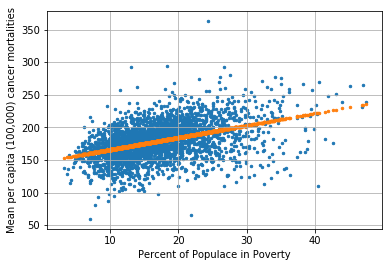

In [72]:
plt.scatter(X5, y, s=6)
plt.scatter(X5, lr.predict(X5), s=6)
plt.grid()
plt.xlabel("Percent of Populace in Poverty", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('povertyPercent_actual_&_predicted_Y.png')

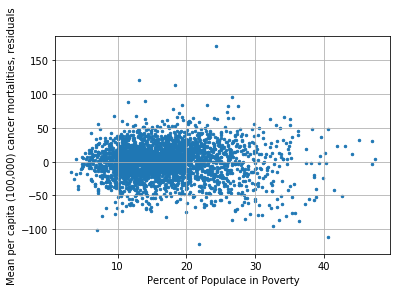

In [73]:
plt.scatter(X5, y - lr.predict(X5), s=6)
plt.grid()
plt.xlabel("Percent of Populace in Poverty", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('povertyPercent_residuals.png')

In [74]:
X5.shape

(3047, 1)

In [75]:
dfx5 = pd.DataFrame(X5)
dfx5.head()

,0
0,21.4
1,22.0
2,19.4
3,11.6
4,10.3


In [76]:
dfx5['povertyPercent_log'] = np.log(X5)

In [77]:
dfx5.head()

,0,povertyPercent_log
0,21.4,3.063391
1,22.0,3.091042
2,19.4,2.965273
3,11.6,2.451005
4,10.3,2.332144


In [78]:
lr.fit(dfx5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
lr.score(dfx5, y)

0.19221642730863686

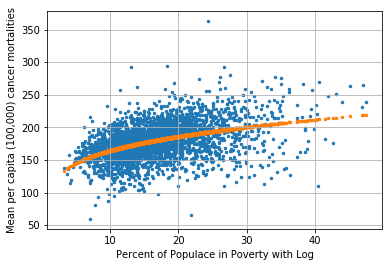

In [80]:
plt.scatter(X5, y, s=6) 
plt.scatter(X5, lr.predict(dfx5), s=6)
plt.grid()
plt.xlabel("Percent of Populace in Poverty with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('povertyPercent_log_actual_&_predicted_Y.png')

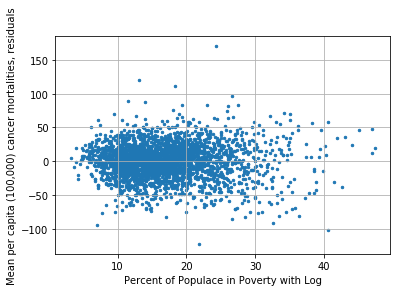

In [81]:
plt.scatter(X5, y - lr.predict(dfx5), s=6)
plt.grid()
plt.xlabel("Percent of Populace in Poverty with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('povertyPercent_log_residuals.png')

In [82]:
dfx5['povertyPercent_sqrd'] = X5**2

In [83]:
dfx5.head()

,0,povertyPercent_log,povertyPercent_sqrd
0,21.4,3.063391,457.96
1,22.0,3.091042,484.00
2,19.4,2.965273,376.36
3,11.6,2.451005,134.56
4,10.3,2.332144,106.09


In [84]:
lr.fit(dfx5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
lr.score(dfx5, y)

0.1924632719740763

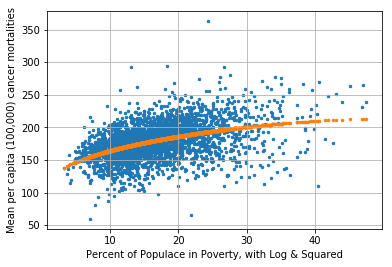

In [86]:
plt.scatter(X5, y, s=6) 
plt.scatter(X5, lr.predict(dfx5), s=6)
plt.grid()
plt.xlabel("Percent of Populace in Poverty, with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('povertyPercent_log_sqrd_actual_&_predicted_Y.png')

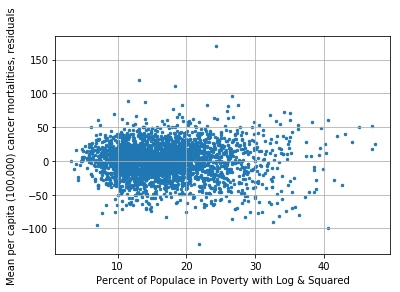

In [87]:
plt.scatter(X5, y - lr.predict(dfx5), s=6)
plt.grid()
plt.xlabel("Percent of Populace in Poverty with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('povertyPercent_log_sqrd_residuals.png')

## studyPerCap: Per capita number of cancer-related clinical trials per county

As there are zero values in 'studyPerCap', a log version can't be made so the exponential version is tried.

In [88]:
X['studyPerCap_sqrd'] = X['studyPerCap']**2

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
lr.score(X_test, y_test)

0.5949611481923202

The squared version of the 'studyPerCap' feature results in a lower accuracy score, so it is dropped from X.

In [92]:
X = X.drop(columns = 'studyPerCap_sqrd')

## MedianAge: Median age of county residents

In [93]:
X['MedianAge_log'] = np.log(X['MedianAge'])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
lr.score(X_test, y_test)

0.5975334173420499

There is an increase in accuracy, so it is added to the core feature set.

In [97]:
cancer['MedianAge_log'] = np.log(cancer['MedianAge'])

In [98]:
X['MedianAge_sqrd'] = X['MedianAge']**2

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
lr.score(X_test, y_test)

0.5968799562741361

There is a decrease in accuracy, so it is dropped from X.

In [102]:
X = X.drop(columns = 'MedianAge_sqrd')

In [103]:
X7 = np.array(cancer['MedianAge'])
X7 = X7.reshape(-1, 1)

In [104]:
lr.fit(X7, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
lr.score(X7, y)

1.802300311537497e-05

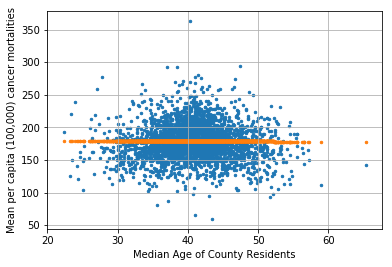

In [106]:
plt.scatter(X7, y, s=6)
plt.scatter(X7, lr.predict(X7), s=6)
plt.grid()
plt.xlabel("Median Age of County Residents", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('MedianAge_actual_&_predicted_Y.png')

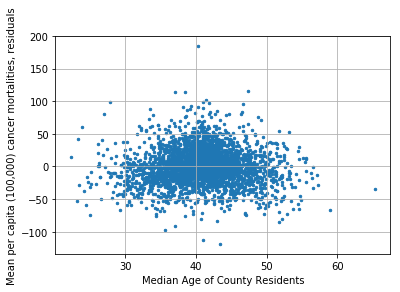

In [107]:
plt.scatter(X7, y - lr.predict(X7), s=6)
plt.grid()
plt.xlabel("Median Age of County Residents", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('MedianAge_residuals.png')

In [108]:
X7.shape

(3047, 1)

In [109]:
dfx7 = pd.DataFrame(X7)
dfx7.head()

,0
0,43.3
1,35.7
2,45.3
3,35.8
4,45.9


In [110]:
dfx7['MedianAge_log'] = np.log(X7)

In [111]:
dfx7.head()

,0,MedianAge_log
0,43.3,3.768153
1,35.7,3.575151
2,45.3,3.813307
3,35.8,3.577948
4,45.9,3.826465


In [112]:
lr.fit(dfx7, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
lr.score(dfx7, y)

0.031746455929645645

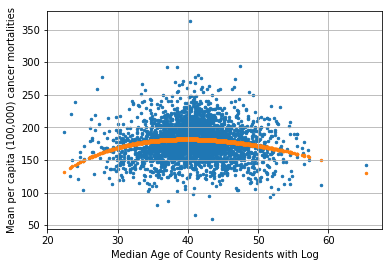

In [114]:
plt.scatter(X7, y, s=6) 
plt.scatter(X7, lr.predict(dfx7), s=6)
plt.grid()
plt.xlabel("Median Age of County Residents with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('MedianAge_log_actual_&_predicted_Y.png')

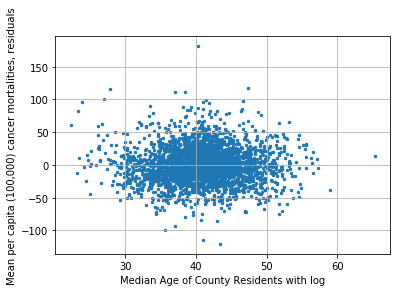

In [115]:
plt.scatter(X7, y - lr.predict(dfx7), s=6)
plt.grid()
plt.xlabel("Median Age of County Residents with log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('MedianAge_log_residuals.png')

## MedianAgeMale: Median Age of male county residents

In [116]:
X['MedianAgeMale_log'] = np.log(X['MedianAgeMale'])

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
lr.score(X_test, y_test)

0.5954151218408441

The logarithmic version of 'MedianAgeMale' resulted in a loss of accuracy, so it is dropped from X.

In [120]:
X = X.drop(columns = 'MedianAgeMale_log')

In [121]:
X['MedianAgeMale_sqrd'] = X['MedianAgeMale']**2

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
lr.score(X_test, y_test)

0.5942862764379679

The squared version again reduced the accuracy. It is dropped from X.

In [125]:
X = X.drop(columns = 'MedianAgeMale_sqrd')

## MedianAgeFemale: Median age of female county residents

In [126]:
X['MedianAgeFemale_log'] = np.log(X['MedianAgeFemale'])

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
lr.score(X_test, y_test)

0.5968304061179586

The logarithmic version of 'MedianAgeFemale' resulted in a decrease of accuracy, so it is dropped from X and will not be added to the core feature set.

In [130]:
X = X.drop(columns = 'MedianAgeFemale_log')

In [131]:
X['MedianAgeFemale_sqrd'] = X['MedianAgeFemale']**2

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
lr.score(X_test, y_test)

0.5975789351409505

The squared version of the 'MedianAgeFemale' feature resulted in an increase in accuracy, so it is added to the core feature set.

In [135]:
cancer['MedianAgeFemale_sqrd'] = cancer['MedianAgeFemale']**2

In [136]:
X9 = np.array(cancer['MedianAgeFemale'])
X9 = X9.reshape(-1, 1)

In [137]:
lr.fit(X9, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [138]:
lr.score(X9, y)

0.0001451636043615645

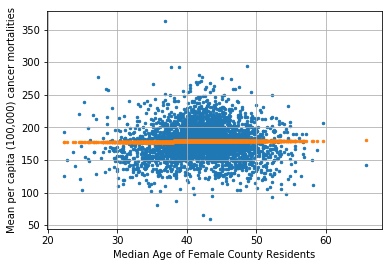

In [139]:
plt.scatter(X9, y, s=6)
plt.scatter(X9, lr.predict(X9), s=6)
plt.grid()
plt.xlabel("Median Age of Female County Residents", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('MedianAgeFemale_actual_&_predicted_Y.png')

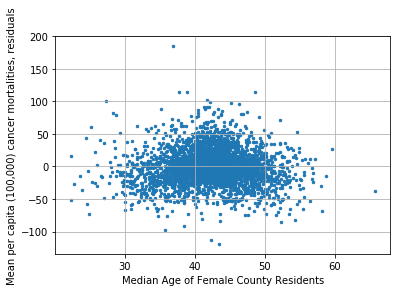

In [140]:
plt.scatter(X9, y - lr.predict(X9), s=6)
plt.grid()
plt.xlabel("Median Age of Female County Residents", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('MedianAgeFemale_residuals.png')

In [141]:
X9.shape

(3047, 1)

In [142]:
dfx9 = pd.DataFrame(X9)
dfx9.head()

,0
0,44.9
1,37.2
2,47.3
3,36.6
4,47.7


In [143]:
dfx9['MedianAgeFemale_sqrd'] = X9**2

In [144]:
dfx9.head()

,0,MedianAgeFemale_sqrd
0,44.9,2016.01
1,37.2,1383.84
2,47.3,2237.29
3,36.6,1339.56
4,47.7,2275.29


In [145]:
lr.fit(dfx9, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
lr.score(dfx9, y)

0.03512101307669879

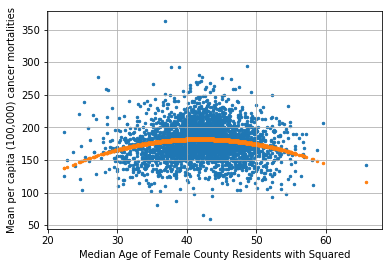

In [147]:
plt.scatter(X9, y, s=6) 
plt.scatter(X9, lr.predict(dfx9), s=6)
plt.grid()
plt.xlabel("Median Age of Female County Residents with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('MedianAgeFemale_sqrd_actual_&_predicted_Y.png')

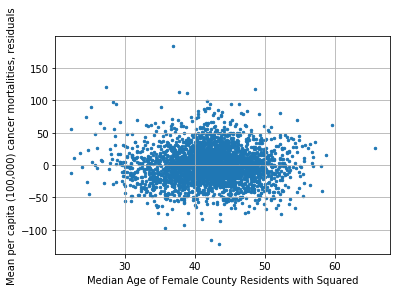

In [148]:
plt.scatter(X9, y - lr.predict(dfx9), s=6)
plt.grid()
plt.xlabel("Median Age of Female County Residents with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('MedianAgeFemale_squared_residuals.png')

## AvgHouseholdSize: Average household size of occupied housing units by tenure

In [149]:
X['AvgHouseholdSize_log'] = np.log(X['AvgHouseholdSize'])

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
lr.score(X_test, y_test)

0.5982777529130276

The log version increased the accuracy, so it is added to the core feature set.

In [153]:
cancer['AvgHouseholdSize_log'] = np.log(cancer['AvgHouseholdSize'])

In [154]:
X['AvgHouseholdSize_sqrd'] = X['AvgHouseholdSize']**2

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
lr.score(X_test, y_test)

0.5967862212586119

The squared version decreased the accuracy, so it is dropped from X.

In [158]:
X = X.drop(columns = 'AvgHouseholdSize_sqrd')

In [159]:
X10 = np.array(cancer['AvgHouseholdSize'])
X10 = X10.reshape(-1, 1)

In [160]:
lr.fit(X10, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
lr.score(X10, y)

0.0011963889547245143

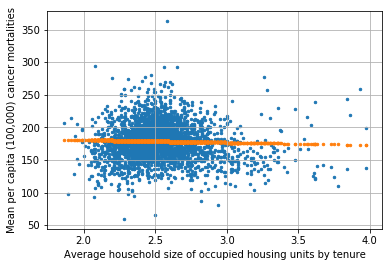

In [162]:
plt.scatter(X10, y, s=6)
plt.scatter(X10, lr.predict(X10), s=6)
plt.grid()
plt.xlabel("Average household size of occupied housing units by tenure", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('AvgHouseholdSize_actual_&_predicted_Y.png')

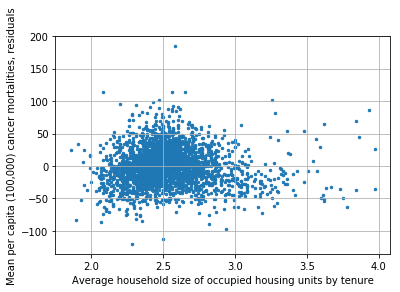

In [163]:
plt.scatter(X10, y - lr.predict(X10), s=6)
plt.grid()
plt.xlabel("Average household size of occupied housing units by tenure", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('AvgHouseholdSize_residuals.png')

In [164]:
X10.shape

(3047, 1)

In [165]:
dfx10 = pd.DataFrame(X10)
dfx10.head()

,0
0,2.52
1,2.70
2,2.29
3,2.61
4,2.25


In [166]:
dfx10['AvgHouseholdSize_log'] = np.log(X10)

In [167]:
dfx10.head()

,0,AvgHouseholdSize_log
0,2.52,0.924259
1,2.70,0.993252
2,2.29,0.828552
3,2.61,0.959350
4,2.25,0.810930


In [168]:
lr.fit(dfx10, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
lr.score(dfx10, y)

0.031185065923630018

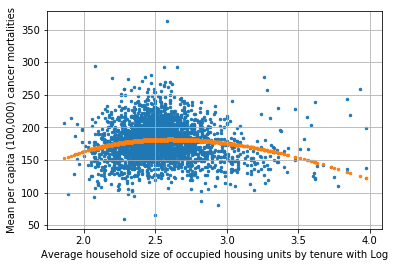

In [170]:
plt.scatter(X10, y, s=6) 
plt.scatter(X10, lr.predict(dfx10), s=6)
plt.grid()
plt.xlabel("Average household size of occupied housing units by tenure with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('AvgHouseholdSize_log_actual_&_predicted_Y.png')

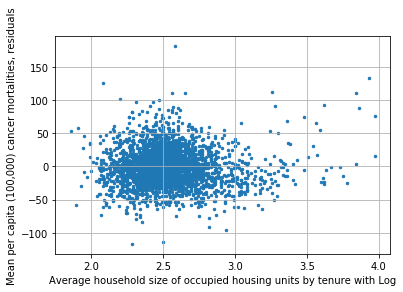

In [171]:
plt.scatter(X10, y - lr.predict(dfx10), s=6)
plt.grid()
plt.xlabel("Average household size of occupied housing units by tenure with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('AvgHouseholdSize_log_residuals.png')

## 'PercentMarried': Percent of county residents who are married

In [172]:
X['PercentMarried_log'] = np.log(X['PercentMarried'])

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [175]:
lr.score(X_test, y_test)

0.6001264722218315

The log version resulted in an increase in accuracy so it is added to the core feature set.

In [176]:
cancer['PercentMarried_log'] = np.log(cancer['PercentMarried'])

In [177]:
X['PercentMarried_sqrd'] = X['PercentMarried']**2

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
lr.score(X_test, y_test)

0.600733141790567

The squared version increased the accuracy further, so it is added to the core feature set.

In [181]:
cancer['PercentMarried_sqrd'] = cancer['PercentMarried']**2

In [182]:
X11 = np.array(cancer['PercentMarried'])
X11 = X11.reshape(-1, 1)

In [183]:
lr.fit(X11, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
lr.score(X11, y)

0.07119315977091079

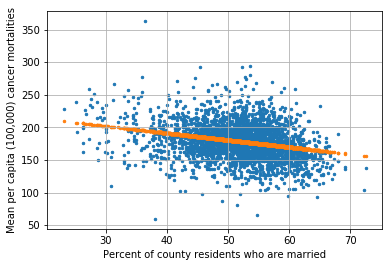

In [185]:
plt.scatter(X11, y, s=6)
plt.scatter(X11, lr.predict(X11), s=6)
plt.grid()
plt.xlabel("Percent of county residents who are married", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PercentMarried_actual_&_predicted_Y.png')

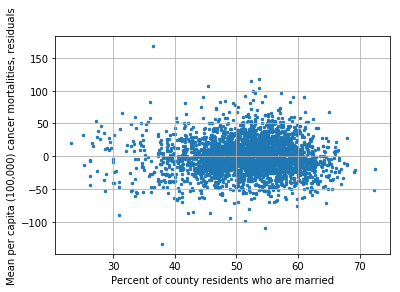

In [186]:
plt.scatter(X11, y - lr.predict(X11), s=6)
plt.grid()
plt.xlabel("Percent of county residents who are married", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PercentMarried_residuals.png')

In [187]:
X11.shape

(3047, 1)

In [188]:
dfx11 = pd.DataFrame(X11)
dfx11.head()

,0
0,46.8
1,47.3
2,52.6
3,53.6
4,56.2


In [189]:
dfx11['PercentMarried_log'] = np.log(X11)

In [190]:
dfx11.head()

,0,PercentMarried_log
0,46.8,3.845883
1,47.3,3.856510
2,52.6,3.962716
3,53.6,3.981549
4,56.2,4.028917


In [191]:
lr.fit(dfx11, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
lr.score(dfx11, y)

0.07501450439510471

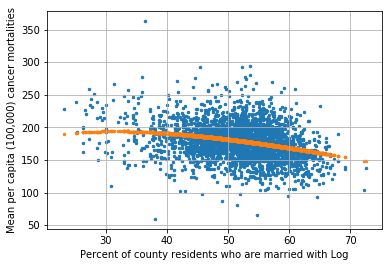

In [193]:
plt.scatter(X11, y, s=6) 
plt.scatter(X11, lr.predict(dfx11), s=6)
plt.grid()
plt.xlabel("Percent of county residents who are married with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PercentMarried_log_actual_&_predicted_Y.png')

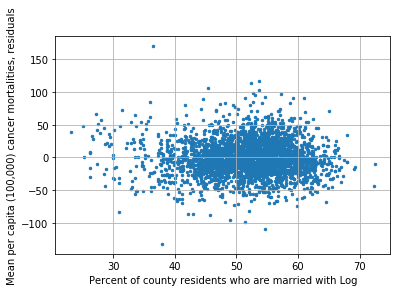

In [194]:
plt.scatter(X11, y - lr.predict(dfx11), s=6)
plt.grid()
plt.xlabel("Percent of county residents who are married with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PercentMarried_log_residuals.png')

In [195]:
dfx11['PercentMarried_sqrd'] = X11**2

In [196]:
dfx11.head()

,0,PercentMarried_log,PercentMarried_sqrd
0,46.8,3.845883,2190.24
1,47.3,3.856510,2237.29
2,52.6,3.962716,2766.76
3,53.6,3.981549,2872.96
4,56.2,4.028917,3158.44


In [197]:
lr.fit(dfx11, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [198]:
lr.score(dfx11, y)

0.08943050803256858

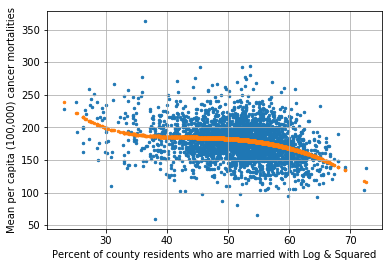

In [199]:
plt.scatter(X11, y, s=6) 
plt.scatter(X11, lr.predict(dfx11), s=6)
plt.grid()
plt.xlabel("Percent of county residents who are married with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PercentMarried_log_sqrd_actual_&_predicted_Y.png')

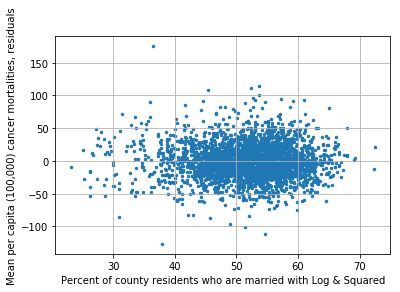

In [200]:
plt.scatter(X11, y - lr.predict(dfx11), s=6)
plt.grid()
plt.xlabel("Percent of county residents who are married with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PercentMarried_log_sqrd_residuals.png')

## 'PctNoHS18_24': Percent of county residents ages 18-24 highest education attained: less than high school

The 'PctNoHS18_24' column has zero values, so a log version is not possible.

In [201]:
X['PctNoHS18_24_sqrd'] = X['PctNoHS18_24']**2

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [204]:
lr.score(X_test, y_test)

0.5970113226402753

The squared version results in a decrease in accuracy, so it is dropped from X.

In [205]:
X = X.drop(columns = 'PctNoHS18_24_sqrd')

## 'PctHS18_24': Percent of county residents ages 18-24 highest education attained: high school diploma

The 'PctHS18_24' column has zero values, so a log version is not possible.

In [206]:
X['PctHS18_24_sqrd'] = X['PctHS18_24']**2

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [209]:
lr.score(X_test, y_test)

0.5988241920179586

There is a decrease in accuracy, so it is dropped from X.

In [210]:
X = X.drop(columns = 'PctHS18_24_sqrd')

## 'PctSomeCol18_24': Percent of county residents ages 18-24 highest education attained: some college

In [211]:
X['PctSomeCol18_24_log'] = np.log(X['PctSomeCol18_24'])

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [214]:
lr.score(X_test, y_test)

0.6009142141405794

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [215]:
cancer['PctSomeCol18_24_log'] = np.log(cancer['PctSomeCol18_24'])

In [216]:
X['PctSomeCol18_24_sqrd'] = X['PctSomeCol18_24']**2

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [219]:
lr.score(X_test, y_test)

0.6013037104848432

The squared version resulted in a further increase in accuracy, so it is added to the core feature set.

In [220]:
cancer['PctSomeCol18_24_sqrd'] = cancer['PctSomeCol18_24']**2

In [221]:
X14 = np.array(cancer['PctSomeCol18_24'])
X14 = X14.reshape(-1, 1)

In [222]:
lr.fit(X14, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [223]:
lr.score(X14, y)

0.009006282122200115

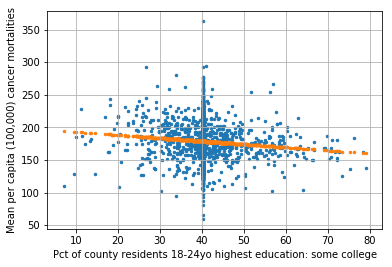

In [224]:
plt.scatter(X14, y, s=6)
plt.scatter(X14, lr.predict(X14), s=6)
plt.grid()
plt.xlabel("Pct of county residents 18-24yo highest education: some college", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctSomeCol18_24_actual_&_predicted_Y.png')

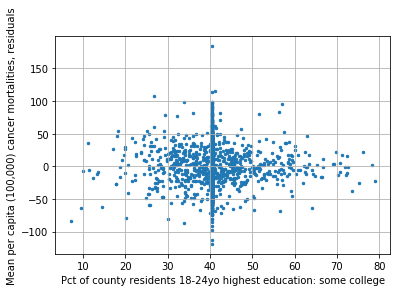

In [225]:
plt.scatter(X14, y - lr.predict(X14), s=6)
plt.grid()
plt.xlabel("Pct of county residents 18-24yo highest education: some college", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctSomeCol18_24_residuals.png')

In [226]:
X14.shape

(3047, 1)

In [227]:
dfx14 = pd.DataFrame(X14)
dfx14.head()

,0
0,40.4
1,36.6
2,40.4
3,48.1
4,40.4


In [228]:
dfx14['PctSomeCol18_24_log'] = np.log(X14)

In [229]:
dfx14.head()

,0,PctSomeCol18_24_log
0,40.4,3.698830
1,36.6,3.600048
2,40.4,3.698830
3,48.1,3.873282
4,40.4,3.698830


In [230]:
lr.fit(dfx14, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [231]:
lr.score(dfx14, y)

0.010048462111071021

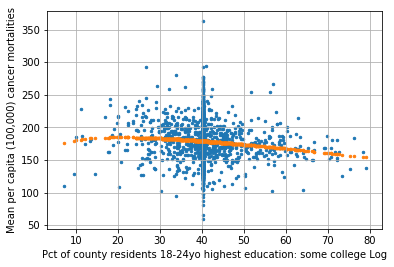

In [232]:
plt.scatter(X14, y, s=6) 
plt.scatter(X14, lr.predict(dfx14), s=6)
plt.grid()
plt.xlabel("Pct of county residents 18-24yo highest education: some college Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctSomeCol18_24_log_actual_&_predicted_Y.png')

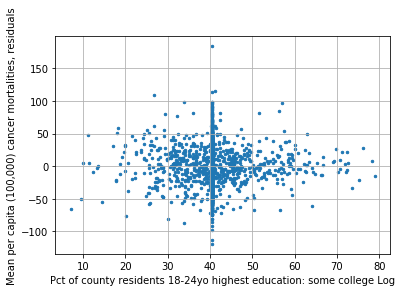

In [233]:
plt.scatter(X14, y - lr.predict(dfx14), s=6)
plt.grid()
plt.xlabel("Pct of county residents 18-24yo highest education: some college Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctSomeCol18_24_log_residuals.png')

In [234]:
dfx14['PctSomeCol18_24_sqrd'] = X14**2

In [235]:
dfx14.head()

,0,PctSomeCol18_24_log,PctSomeCol18_24_sqrd
0,40.4,3.698830,1632.16
1,36.6,3.600048,1339.56
2,40.4,3.698830,1632.16
3,48.1,3.873282,2313.61
4,40.4,3.698830,1632.16


In [236]:
lr.fit(dfx14, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [237]:
lr.score(dfx14, y)

0.011608669062523003

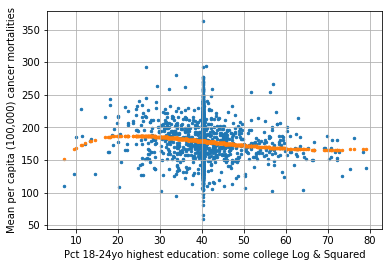

In [239]:
plt.scatter(X14, y, s=6) 
plt.scatter(X14, lr.predict(dfx14), s=6)
plt.grid()
plt.xlabel("Pct 18-24yo highest education: some college Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctSomeCol18_24_log_sqrd_actual_&_predicted_Y.png')

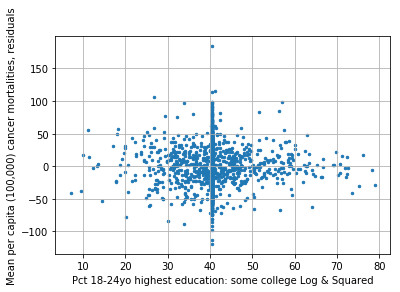

In [240]:
plt.scatter(X14, y - lr.predict(dfx14), s=6)
plt.grid()
plt.xlabel("Pct 18-24yo highest education: some college Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctSomeCol18_24_log_sqrd_residuals.png')

## 'PctBachDeg18_24': Percent of county residents ages 18-24 highest education attained: bachelor's degree 

The 'PctBachDeg18_24' feature has zero values, so a log version is not possible.

In [241]:
X['PctBachDeg18_24_sqrd'] = X['PctBachDeg18_24']**2

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [244]:
lr.score(X_test, y_test)

0.6012427089780076

There is a decrease in accuracy with the squared version, so it is dropped from X.

In [245]:
X = X.drop(columns = 'PctBachDeg18_24_sqrd')

In [246]:
cancer.to_csv('cancer_ml3.csv')